<div><p>In the "Line Graphs and Time Series" lesson, we started with an important distinction between exploratory and explanatory data visualization:</p>
<ul>
<li>Exploratory data visualization: we build graphs for <em>ourselves</em> to explore data and find patterns.</li>
<li>Explanatory data visualization: we build graphs for <em>others</em> to communicate and explain the patterns we've found through exploring data.</li>
</ul>
<p></p><center><img src="https://s3.amazonaws.com/dq-content/520/exploratory_explanatory.svg" alt="img"></center><p></p>
<p>In this lesson, we'll continue learning exploratory data visualization — we'll learn about seasonality, scatter plots, and correlation.</p>
<p>We'll use time series data about bike sharing (recall that a time series is a series of data points listed in time order).</p>
<p>Bike sharing companies allow people to rent bikes for short trips. Someone can rent a bike from a station near their location, take a ride, and then return the bike to any other station.</p>
<p></p><center>
<img src="https://s3.amazonaws.com/dq-content/521/m2_screen1_1.jpg" alt="img" width="600" height="400">
<a href="https://en.wikipedia.org/wiki/Capital_Bikeshare#/media/File:Capital_Bikeshare_station_outside_Eastern_Market_Metro.jpg" target="_blank">Source: Wikipedia</a>
</center><p></p>
<p>Our dataset describes the daily activity of Capital Bikeshare (a bike-sharing company). Let's take a look at the first five rows:</p>
<table class="dataframe">
<thead>
<tr>
<th></th>
<th>instant</th>
<th>dteday</th>
<th>season</th>
<th>yr</th>
<th>mnth</th>
<th>holiday</th>
<th>weekday</th>
<th>workingday</th>
<th>weathersit</th>
<th>temp</th>
<th>atemp</th>
<th>hum</th>
<th>windspeed</th>
<th>casual</th>
<th>registered</th>
<th>cnt</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>1</td>
<td>2011-01-01</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>6</td>
<td>0</td>
<td>2</td>
<td>0.344167</td>
<td>0.363625</td>
<td>0.805833</td>
<td>0.160446</td>
<td>331</td>
<td>654</td>
<td>985</td>
</tr>
<tr>
<th>1</th>
<td>2</td>
<td>2011-01-02</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>2</td>
<td>0.363478</td>
<td>0.353739</td>
<td>0.696087</td>
<td>0.248539</td>
<td>131</td>
<td>670</td>
<td>801</td>
</tr>
<tr>
<th>2</th>
<td>3</td>
<td>2011-01-03</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>1</td>
<td>1</td>
<td>0.196364</td>
<td>0.189405</td>
<td>0.437273</td>
<td>0.248309</td>
<td>120</td>
<td>1229</td>
<td>1349</td>
</tr>
<tr>
<th>3</th>
<td>4</td>
<td>2011-01-04</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>2</td>
<td>1</td>
<td>1</td>
<td>0.200000</td>
<td>0.212122</td>
<td>0.590435</td>
<td>0.160296</td>
<td>108</td>
<td>1454</td>
<td>1562</td>
</tr>
<tr>
<th>4</th>
<td>5</td>
<td>2011-01-05</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>3</td>
<td>1</td>
<td>1</td>
<td>0.226957</td>
<td>0.229270</td>
<td>0.436957</td>
<td>0.186900</td>
<td>82</td>
<td>1518</td>
<td>1600</td>
</tr>
</tbody>
</table>
<p>Each row describes the number of bike rentals for a single day and the corresponding weather. The data spans a period of two years (January 1, 2011 – December 31, 2012). Here are some of the columns we'll be focusing on:</p>
<ul>
<li><code>dteday</code>: date in year-month-day format.</li>
<li><code>temp</code>: normalized temperature in Celsius (1 is the maximum value, and it's equivalent to 41 Celsius degrees).</li>
<li><code>atemp</code>: normalized feeling temperature in Celsius (1 is the maximum value, and it's equivalent to 50 Celsius degrees).</li>
<li><code>hum</code>: normalized humidity.</li>
<li><code>windspeed</code>: normalized wind speed.</li>
<li><code>casual</code>: the number of casual (non-registered) people who rented a bike that day.</li>
<li><code>registered</code>: the number of registered people who rented a bike that day (registered people bought a membership).</li>
<li><code>cnt</code>: the total number of people who rented a bike (casual plus registered).</li>
</ul>

<p>Let's read in the dataset using pandas. On the next screen, we'll start exploring the dataset using visualization.</p></div>

<h3>Exercise</h3>
<br>
<div><ol>
<li>Import the <code>pandas</code> module as <code>pd</code>.</li>
<li>Read in the <code>day.csv</code> file using the <code>pd.read_csv()</code> function. Assign the result to a variable named <code>bike_sharing</code>.</li>
<li>Examine the first and the last five rows.</li>
<li>Display information about the dataset using the <code>DataFrame.info()</code> method. How many rows and columns does this dataset have? Do you see any missing values?</li>
</ol></div>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
bike_sharing = pd.read_csv('day.csv')

In [43]:
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [44]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [45]:
bike_sharing.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [46]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


<h1> Exploring Data</h1> 
<br>
<div><p>Now that we've familiarized ourselves with the bike-sharing dataset, let's explore it using data visualization methods.</p>
<p>We can start by visualizing how the total number of bike rentals changed over time. To do this, we'll create a line graph with the <code>dteday</code> column on the x-axis and the <code>cnt</code> column on the y-axis.</p>
</div>

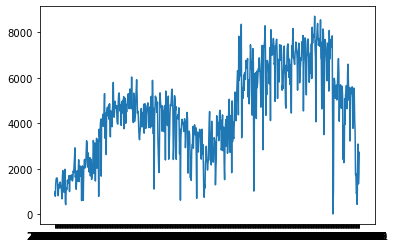

In [47]:
import matplotlib.pyplot as plt
plt.plot(bike_sharing['dteday'], bike_sharing['cnt'])
plt.show()

<div>
<p>One of the first things that draws our attention above is the two black bands at the bottom. This is related to the data type of the <code>dteday</code> column — the data type is <code>object</code>, which is the pandas equivalent of a string. </p>
<p>When we pass a series of strings to <code>plt.plot()</code>, Matplotlib doesn't know how to handle that very well. If the strings are convertible, it's better to convert them explicitly to either a numerical data type or a datetime.</p>
<p>With pandas, we can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html" target="_blank"><code>pd.to_datetime()</code> function</a> to make the conversion:</p>
</div>

In [48]:
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

<div>
<p>We converted the <code>dteday</code> column to datetime, and now we no longer see the black bands at the bottom.</p>
</div>


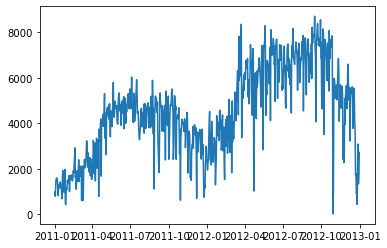

In [49]:
plt.plot(bike_sharing['dteday'], bike_sharing['cnt'])
plt.show()

<p>However, now the dates on the bottom of the graph are overlapping and we can barely read them. To fix this, we can rotate the labels using the <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html" target="_blank"><code>plt.xticks()</code> function</a>. The function has a <code>rotation</code> parameter which we can use to control the angle of rotation.</p>

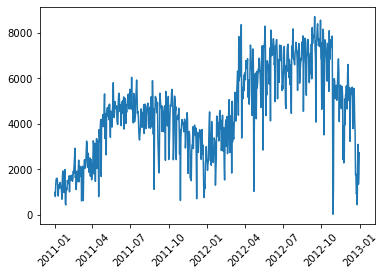

In [50]:
plt.plot(bike_sharing['dteday'], bike_sharing['cnt'])
plt.xticks(rotation=45)
plt.show()

<p>The <code>plt.xticks()</code> function takes its name from the little lines on each axis to show unit lengths. These lines are called <strong>ticks</strong>, and the corresponding labels are <strong>tick labels</strong>. The x-axis has x-ticks, and the y-axis has y-ticks — there's also a <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.yticks.html" target="_blank"><code>plt.yticks()</code> function</a>.</p>

<center>
<img src="figs/m2_figma_1.png" alt="img">
</center>

<h3>Exercise</h3>
<br>
<ol>
<li>Plot two line graphs sharing the same x- and y-axis.<ul>
<li>For the first graph, plot the <code>dteday</code> column on the x-axis and the <code>casual</code> column on the y-axis.</li>
<li>For the second graph, plot <code>dteday</code> on the x-axis and <code>registered</code> on the y-axis.</li>
</ul>
</li>
<li>Rotate the x-ticks to an angle of 30 degrees using <code>plt.xticks()</code>.</li>
<li>Add the label <code>'Bikes Rented'</code> to the y-axis using <code>plt.ylabel()</code>.</li>
<li>Add the label <code>'Date'</code> to the x-axis using <code>plt.xlabel()</code>.</li>
<li>Add the title <code>'Bikes Rented: Casual vs. Registered'</code> using <code>plt.title()</code>.</li>
<li>Add a legend using <code>plt.legend()</code>. Use <code>'Casual'</code> and <code>'Registered'</code> as labels.</li>
<li>What differences and similarities do you see for the two line graphs?</li>
</ol>

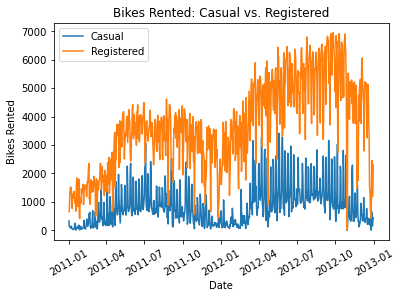

In [51]:
plt.plot(bike_sharing['dteday'], bike_sharing['casual'], label='Casual')
plt.plot(bike_sharing['dteday'], bike_sharing['registered'], label='Registered')
plt.xticks(rotation=30)
plt.xlabel('Date')
plt.ylabel('Bikes Rented')
plt.title('Bikes Rented: Casual vs. Registered')
plt.legend()
plt.show()

<h1>Seasonal Trends</h1>
<br>
<p>We started by creating a line graph to examine how the total number of bike rentals changed over time.</p>


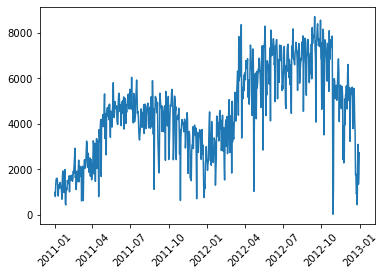

In [52]:
plt.plot(bike_sharing['dteday'], bike_sharing['cnt'])
plt.xticks(rotation=45)
plt.show()

<div>
<p>Looking at the entire two-year period, we see the number of rented bikes is at its lowest during the winter months and at its highest during the summer (Capital Bikeshare operates only in the northern hemisphere, so the summer months are June-August, and the winter months are December-February).</p>
<p>In fact, we see quite a few similar patterns for both 2011 and 2012 with respect to the number of rented bikes:</p>
<ul>
<li>The number keeps increasing in the January-May interval.</li>
<li>We see a plateau in the May-September interval, where the number of rentals stays high but constant (it neither increases nor decreases very much).</li>
<li>The number keeps decreasing in the September-December interval.</li>
</ul>
<p>We call all of these similarities <strong>seasonal trends</strong>. In time series data, we sometimes see specific patterns occurring regularly at specific intervals of time — we call this <strong>seasonality</strong>.</p>
<p>Weather, holidays, school vacations and other factors can often cause seasonality. One popular example is ice-cream sales seasonality, which we can attribute to variations in air temperature: sales are high during summer and low during winter.</p>
<p></p><center><img src="figs/seasonality.svg" alt="img"></center><p></p>
<p>Identifying seasonality can be useful for businesses:</p>
<ul>
<li>They can plan marketing campaigns at the right time.</li>
<li>They don't need to panic needlessly when the sales are decreasing as a result of seasonality.</li>
<li>They can hire extra employees right before the period of high activity begins.</li>
</ul>
<p>In our case, what could be causing the seasonality in the number of rented bikes?</p>
<p>Biking is an outdoor activity, and people often don't ride when it's too cold outside — the wind feels very cold when you're moving.</p>
<p>Let's see if we can find any similarity between how air temperature and the number of bikes rented changed over the course of 2011 and 2012.</p></div>

<h3>Exercise</h3>
<br>
<ol>
<li>Plot a line graph with the <code>dteday</code> column on the x-axis and the <code>temp</code> column on the y-axis.</li>
<li>Rotate the x-ticks to an angle of 45 degrees using <code>plt.xticks()</code>.</li>
<li>Do you see any similarity in how the temperature and the number of bikes rented change?</li>
</ol>

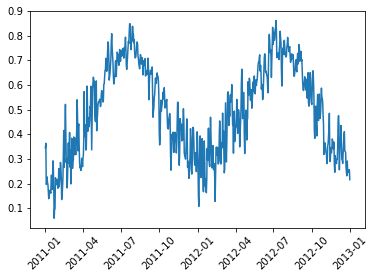

In [53]:
plt.plot(bike_sharing['dteday'], bike_sharing['temp'])
plt.xticks(rotation=45)
plt.show()

<h1>Scatter Plots</h1>
<br>
<div><p>We've plotted <code>dteday</code> against <code>cnt</code> on a line graph, and we identified a few seasonal trends. We hypothesized that this seasonality might be related to temperature variations.</p>
<p>The similarity in how the air temperature and the number of rented bikes changed over 2011 and 2012 supports this hypothesis.</p>
<p></p><center>
<img src="https://s3.amazonaws.com/dq-content/521/m2_screen4_1.png" alt="img">
</center><p></p>
<p>We see that when the temperature grows, the number of bike rentals tends to grow too. When the temperature decreases, the number of rentals tends to decrease too. Although the relationship isn't perfect, the values in the two columns follow similar patterns in how they change.</p>
<p>Above, we plotted <code>cnt</code> and <code>temp</code> against <code>dteday</code>. To visualize the relationship between <code>cnt</code> and <code>temp</code>, it's better if we plot one against the other, and leave out the <code>dteday</code> column. We can do this with a <strong>scatter plot</strong> (also known as scatter graph or scatter chart).</p>
<p>Let's start by creating a scatter plot using the <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html" target="_blank"><code>plt.scatter()</code> function</a>:</p>
</div>

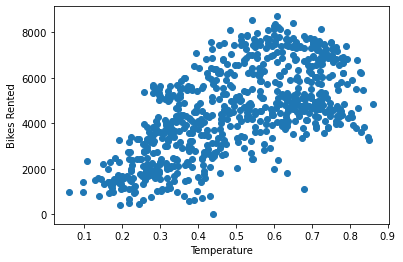

In [54]:
plt.scatter(bike_sharing['temp'], bike_sharing['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bikes Rented')
plt.show()

<div>
<p>Each point (also called a marker) on the scatter plot has an x-coordinate and an y-coordinate. Above, the <code>temp</code> column provides the x-coordinates, and the <code>cnt</code> column provides the y-coordinates.</p>
<p>Generally, the first column we pass to <code>plt.scatter(x, y)</code> provides the x-coordinates, and the second one the y-coordinates.</p>
<p>One thing we notice in the scatter plot above is that the overall direction of the points is upward (seen from left to right). This is because as the temperature increases, the number of bike rentals tends to grow too.</p>
<p>Seen from right to left, the direction of the points is downward — as the temperature decreases, the number of rentals also tends to decrease.</p>
<p></p><center>
<img src="figs/correlation_viz.svg" alt="img">
</center><p></p>
<p>Let's now plot <code>windspeed</code> against <code>cnt</code> on a scatter plot. What direction of the points do you expect to see considering that a strong wind can cause people to rent fewer bikes?</p></div>

<h3>Exercise</h3>
<br>
<ol>
<li>Generate a scatter plot with the <code>windspeed</code> column on the x-axis and the <code>cnt</code> column on the y-axis. Use the <code>plt.scatter()</code> function.</li>
<li>Add the <code>'Wind Speed'</code> x-axis label using <code>plt.xlabel()</code>.</li>
<li>Add the <code>'Bikes Rented'</code> y-axis label using <code>plt.ylabel()</code>.</li>
<li>Display the plot using <code>plt.show()</code>.</li>
</ol>

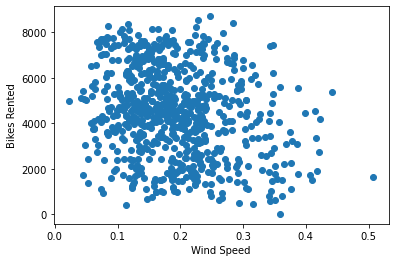

In [55]:
plt.scatter(bike_sharing['windspeed'], bike_sharing['cnt'])
plt.xlabel('Wind Speed')
plt.ylabel('Bikes Rented')
plt.show()

<div><p>On the previous cells, we generated two scatter plots:</p>
<ul>
<li><code>temp</code> versus <code>cnt</code></li>
<li><code>windspeed</code> versus <code>cnt</code></li>
</ul>
<p></p><center>
<img src="figs/m2_screen5_1.png" alt="img">
</center><p></p>
<p>The general direction of the points (seen from left to right) is different on the two plots:</p>
<ul>
<li><code>temp</code> versus <code>cnt</code> shows an upward trend</li>
<li><code>windspeed</code> versus <code>cnt</code> shows a downward trend (approximately)</li>
</ul>
<p>Both the <code>temp</code> and the <code>windpseed</code> columns relate to the <code>cnt</code> column, but in a different way.</p>
<p>When the values in <code>temp</code> increase, the values in <code>cnt</code> tend to go up as well (and vice versa). When the values in <code>temp</code> decrease, the values in <code>cnt</code> tend to go down as well (and vice versa).</p>
<p>On the other side, when the values in <code>windspeed</code> increase, the values in <code>cnt</code> don't go up — they tend to decrease instead. When the values in <code>windspeed</code> decrease, the values in <code>cnt</code> tend to go up (and vice versa).</p>
<p>In a broad sense, when two columns are statistically related in a specific way and to a certain degree, we call this relationship <strong>correlation</strong>.</p>
<p>There are two kinds of correlation: positive and negative.</p>
<p>Two positively correlated columns tend to change in the same direction — when one increases (or decreases), the other tends to increase (or decrease) as well. On a scatter plot, two positively correlated columns show an upward trend (like in the <code>temp</code> versus <code>cnt</code> plot).</p>
<p></p><center><img src="figs/positive_correlation.svg" alt="img"></center><p></p>
<p>Two negatively correlated columns tend to change in opposite directions — when one increases, the other tends to decrease, and vice versa. On a scatter plot, two negatively correlated columns show a downward trend (like in the <code>windspeed</code> versus <code>cnt</code> plot).</p>
<p></p><center><img src="figs/negative_correlation.svg" alt="img"></center><p></p>
<p>Not all pairs of columns are correlated. We often see two columns changing together in a way that shows no clear pattern. The values in the columns increase and decrease without any correlation.</p>
<p>As a side note, we often call columns in a dataset <strong>variables</strong> (different from programming variables). For this reason, you'll often hear people saying that two variables (columns) are correlated.</p>
</div>

<h3>Exercise</h3>
<br>
<ol>
<li>Generate a scatter plot with the <code>atemp</code> column (feeling temperature) on the x-axis and the <code>registered</code> column on the y-axis.</li>
<li>Run your code without submitting the answer. Inspect the resulting scatter plot.</li>
<li>What type of correlation do you see between the <code>atemp</code> and <code>registered</code> columns? Assign your answer to the variable <code>correlation</code> — choose between the strings <code>'positive'</code>, <code>'negative'</code>, and <code>'no correlation'</code>.</li>
</ol>

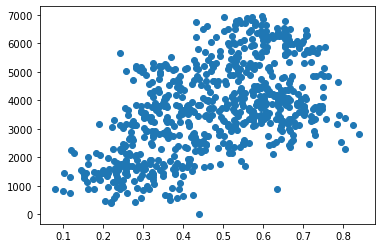

In [56]:
plt.scatter(bike_sharing['atemp'], bike_sharing['registered'])
plt.show()

correlation = 'positive'

<h1>Pearson Correlation Coefficient</h1>
<br>
<div><p>We learned that columns can be positively or negatively correlated (or not correlated at all).</p>
<p>Some pairs of columns have a stronger (or weaker) correlation than others. The correlation between columns X and Y can be stronger than that between columns X and Z.</p>
<p>If we look at the two graphs below, it's easier to tell the overall direction of the points for the graph on the left. That's because the correlation between <code>temp</code> and <code>cnt</code> is stronger than that between <code>windspeed</code> and <code>cnt</code>.</p>
<p></p><center>
<img src="figs/m2_screen5_1.png" alt="img">
</center><p></p>
<p>The most popular way to measure correlation strength is by calculating the degree to which the points on a scatter plot fit on a straight line.</p>
<p></p><center>
<img src="figs/pos_nul_neg.svg" alt="img">
</center><p></p>
<p>We can measure how well the points fit on a straight line by using the <strong>Pearson correlation coefficient</strong> — also known as <strong>Pearson's r</strong>.</p>
<p>Pearson's r values lie between -1.00 and +1.00. When the positive correlation is perfect, the Pearson's r is equal to +1.00. When the negative correlation is perfect, the Pearson's r is equal to -1.00. A value of 0.0 shows no correlation. </p>
<p></p><center>
<img src="figs/pos_nul_neg_r.svg" alt="img">
</center><p></p>
<p>Below, we see various scatter plot shapes along with their corresponding Pearson's r.</p>
<p></p><center>
<img src="figs/m2_screen6_1.png" alt="img">
<a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#/media/File:Correlation_examples2.svg" target="_blank">Source:Wikipedia</a>
</center><p></p>
<p>If columns X and Y have <em>r = +0.8</em>, and columns X and Z have <em>r = -0.8</em>, then the strength of these two correlations is equal. The minus sign only tells us that the correlation is negative, not that it is weaker.</p>
<p>For example, even though the number +0.2 is greater than -0.6, a -0.6 correlation is stronger compared to a +0.2 correlation.</p>
<p>When we compare correlation strengths, we need to ignore the signs and only look at the absolute <em>r</em> values. The sign only gives us the correlation's direction, not its strength.</p>
</div>

<div><p>Evaluate the truth value of the following sentences.</p>
<ol>
<li>The correlation between <code>temp</code> and <code>cnt</code> is +0.63, so it's stronger than the correlation between <code>windspeed</code> and <code>cnt</code>, which is -0.23 (the two correlation values are real). Assign the Boolean <code>True</code> or <code>False</code> to <code>sentence_1</code>.</li>
<li>A correlation of +0.09 shows a weak positive correlation. Assign <code>True</code> or <code>False</code> to <code>sentence_2</code>.</li>
<li>A correlation of 0 shows a very weak negative correlation. Assign <code>True</code> or <code>False</code> to <code>sentence_3</code>.</li>
<li>A perfect positive correlation is equal in strength with a perfect negative correlation. Assign <code>True</code> or <code>False</code> to <code>sentence_4</code>.</li>
</ol></div>

In [57]:
sentence_1 = True
sentence_2 = True
sentence_3 = False
sentence_4 = True

<h1>Measuring Pearson's r </h1>


<p>We learned about Pearson's r as a way to measure the strength of a correlation. In the exercise, we mentioned that the correlation between the <code>temp</code> and <code>cnt</code> columns is +0.63, and the correlation between <code>windspeed</code> and <code>cnt</code> is -0.23.</p>

<p>To calculate the Pearson's r between any two columns, we can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html" target="_blank"><code>Series.corr()</code> method</a>. For instance, this is how we can calculate the two correlations above:</p>


In [10]:
bike_sharing['temp'].corr(bike_sharing['cnt'])

0.6274940090334918

In [11]:
bike_sharing['windspeed'].corr(bike_sharing['cnt'])

-0.23454499742167

<div>
<p>The order of columns doesn't matter when we use <code>Series.corr()</code>. Below, the r values are the same, although we use the columns in reverse order:</p>
</div>

In [12]:
# Previously: bike_sharing['temp'].corr(bike_sharing['cnt'])
bike_sharing['cnt'].corr(bike_sharing['temp'])

0.6274940090334918

In [13]:
# Previously: bike_sharing['windspeed'].corr(bike_sharing['cnt'])
bike_sharing['cnt'].corr(bike_sharing['windspeed'])

-0.23454499742167

<div>
<p><code>Series.corr()</code> uses a math formula that only works with numbers. This means that <code>Series.corr()</code> only works with numerical columns — if we use string or datetime columns, we'll get an error.</p>
<p>As a side note, teaching the math behind Pearson's r is beyond the scope of this visualization lesson. Here, we focus on how to interpret and visualize correlation.</p>
<p>The <code>Series.corr()</code> method only allows us to calculate the correlation between two numerical columns. We can get an overview of correlations using the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html" target="_blank"><code>DataFrame.corr()</code> method</a>, which calculates the Pearson's r between all pairs of numerical columns.</p>
</div>

In [14]:
bike_sharing.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


<p>Most often, we're only interested in finding the correlation for just a few columns. For example, what if we only want to see the correlation for the <code>cnt</code>, <code>casual</code>, and <code>registered</code> columns? The <code>DataFrame.corr()</code> method returns a <code>DataFrame</code>, which means we can select the <code>cnt</code>, <code>casual</code>, and <code>registered</code> columns directly.</p>

In [15]:
bike_sharing.corr()[['cnt', 'casual', 'registered']]

,cnt,casual,registered
instant,0.628830,0.275255,0.659623
season,0.406100,0.210399,0.411623
yr,0.566710,0.248546,0.594248
mnth,0.279977,0.123006,0.293488
holiday,-0.068348,0.054274,-0.108745
weekday,0.067443,0.059923,0.057367
workingday,0.061156,-0.518044,0.303907
weathersit,-0.297391,-0.247353,-0.260388
temp,0.627494,0.543285,0.540012
atemp,0.631066,0.543864,0.544192


<h3>Excercise</h3>
<br>
<ol>
<li>Calculate the Pearson's r between the <code>temp</code> and <code>atemp</code> columns. Assign your answer to <code>temp_atemp_corr</code>.</li>
<li>Calculate the Pearson's r between the <code>windspeed</code> and <code>hum</code> columns. Assign your answer to <code>wind_hum_corr</code>.</li>
<li>Generate a scatter plot with the <code>temp</code> column on the x-axis and the <code>atemp</code> column on the y-axis.<ul>
<li>Add <code>'Air Temperature'</code> as an x-label.</li>
<li>Add <code>'Feeling Temperature'</code> as an y-label.</li>
</ul>
</li>
<li>Generate a scatter plot with the <code>windspeed</code> column on the x-axis and the <code>hum</code> column on the y-axis. You'll first need to close the previous scatter plot using <code>plt.show()</code><ul>
<li>Add <code>'Wind Speed'</code> as an x-label.</li>
<li>Add <code>'Humidity'</code> as an y-label.</li>
</ul>
</li>
</ol>

In [16]:
temp_atemp_corr = bike_sharing['temp'].corr(bike_sharing['atemp'])
print(temp_atemp_corr)

0.9917015532294641


In [17]:
wind_hum_corr = bike_sharing['windspeed'].corr(bike_sharing['hum'])
print(wind_hum_corr)

-0.2484890986437141


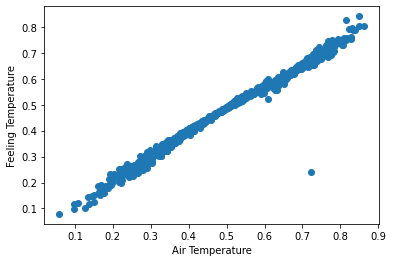

In [18]:
plt.scatter(bike_sharing['temp'], bike_sharing['atemp'])
plt.xlabel('Air Temperature')
plt.ylabel('Feeling Temperature')
plt.show()

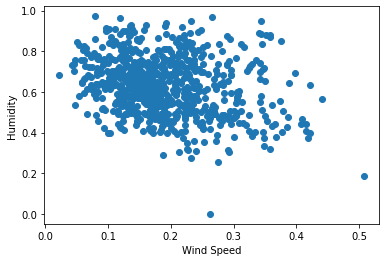

In [19]:
plt.scatter(bike_sharing['windspeed'], bike_sharing['hum'])
plt.xlabel('Wind Speed')
plt.ylabel('Humidity')
plt.show()

<h1>Categorical Columns</h1>
<br>
<div><p>On the previous screen, we introduced <code>Series.corr()</code> and <code>DataFrame.corr()</code> as methods we can use to measure Pearson's. We also mentioned that <code>Series.corr()</code> only works with numerical columns, and inputting strings or datetime objects results in an error.</p>
<p>Generally, numerical columns describe a quantity — how much there is of something.</p>
<p>But we also have columns that describe qualities — what or how something is. These columns are <strong>categorical</strong> (or qualitative).</p>
<p>One example of a categorical column (also called categorical variable) is the <code>workingday</code> column. This column describes the type of day: a working day or a non-working day (weekend or holiday).</p>
</div>

In [20]:
bike_sharing['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

<div>
<p>Although it's categorical, the <code>workingday</code> column is encoded with numbers (<code>1</code> means a working day and <code>0</code> means a non-working day).</p>
<p>Because it's encoded with numbers, we can calculate correlations using <code>Series.corr()</code>. For instance, let's calculate its correlation with the <code>casual</code> and <code>registered</code> columns.</p>
</div>

In [26]:
# bike_sharing.corr()['workingday'][['casual', 'registered']]
bike_sharing.corr().loc['workingday', ['casual', 'registered']]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

<div>
<p>We can see a negative correlation with the <code>casual</code> column (-0.52), and a positive correlation with the <code>registered</code> column (+0.30).</p>
<p>These values suggest that registered users tend to use the bikes more on working days (to commute to work probably), while casual (non-registered) users tend to rent the bikes more on the weekends and holidays (maybe to spend some leisure time).</p>
<p>However, the <code>1</code> and <code>0</code> encoding is arbitrary. The creators of this dataset could have assigned <code>0</code> to a working day and <code>1</code> to a non-working day. Below, we make this change ourselves:</p>
</div>

In [27]:
bike_sharing['workingday'].replace({1:0, 0:1}, inplace=True)

<p>After we changed <code>1</code> to <code>0</code> and vice versa, the correlation strengths remained the same, but their sign changed (minus becomes plus and vice versa):</p>

In [28]:
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual        0.518044
registered   -0.303907
Name: workingday, dtype: float64

<div>
<p>If we are careful about what <code>1</code> and <code>0</code> mean, we reach the same conclusion as above (registered users tend to use the bikes more on working days, while casual users tend to ride the bikes more on the weekends and holidays).</p>
<p>The takeaway is that when we're working with categorical columns that have been encoded with numbers, we need to interpret the sign of the correlation with caution.</p>
<p>Because the encoding is arbitrary, the correlation can be both positive and negative, depending on how the creators of the dataset chose to encode the values of that column.</p>
<p>Often, the best thing we can do is acknowledge that there's a correlation but avoid talking about the correlation as being positive or negative.</p>
<p>Let's now do an exercise and continue the discussion on the next screen. We're going to use the <code>weathersit</code> column, which is categorical and has four unique values describing the weather:</p>
<ul>
<li><code>1</code>: clear or few clouds</li>
<li><code>2</code>: mist or cloudy</li>
<li><code>3</code>: light rain, light snow, thunderstorm</li>
<li><code>4</code>: heavy rain, snow, ice pellets, fog</li>
</ul></div>

<h3>Exercise</h3>
<br>
<div><p>Evaluate the following sentences.</p>
<ol>
<li>The worse the weather, the higher the encoding number in the <code>weathersit</code> column. Assign <code>True</code> or <code>False</code> to <code>sentence_1</code>.</li>
<li>The correlation between <code>weathersit</code> and <code>cnt</code> is -0.30 — this means that as the weather gets worse, the number of bike rentals tends to decrease. Assign <code>True</code> or <code>False</code> to <code>sentence_2</code>.</li>
<li>The correlation between <code>weathersit</code> and <code>hum</code> is +0.59 — this means that as the humidity decreases, the weather tends to get better. Assign <code>True</code> or <code>False</code> to <code>sentence_3</code>.</li>
</ol></div>

<h1>Correlation vs. Causation</h1>
<br>
<div><p>We learned how to measure, interpret, and visualize correlations.</p>
<p>When we find a strong correlation between two columns, one common mistake is to assume that the columns must also have a relationship of causality — one is the cause, and the other is the effect.</p>
<p>For instance, let's say we found a strong positive correlation between the number of bike rentals and ice cream sales. When the number of bike rentals goes up, the number of ice cream sales tends to go up as well. When bike rentals decrease, ice cream sales tend to decrease too.</p>
<p>The positive correlation doesn't imply that ice cream sales are causing bike rentals to increase or decrease (or vice versa). Most likely, both ice cream sales and bike rentals are related to temperature variations in a similar way, and this is why they change together similarly.</p>
<p>However, correlation can suggest causality. If two columns are correlated, it might be because of a cause-and-effect relationship. It might. To establish a relationship of causality, we often need to perform a rigorous experiment.</p>
</div>